### Create an unit index figure

In [7]:
cd /rds/general/user/jx622/home/
%load one dataset first
load /rds/general/user/jx622/home/All/prep_data_791319847.mat

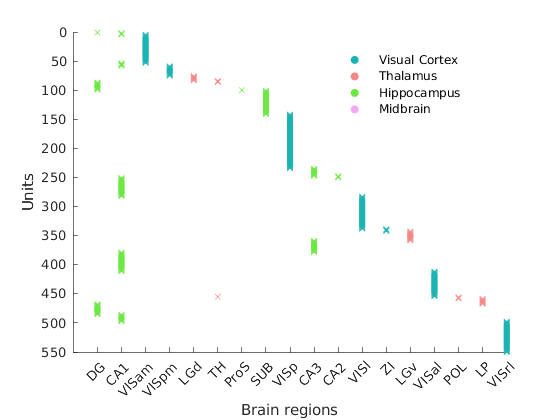

In [10]:
% Find unique regions and keep the original order
[unique_regs, ~, idx] = unique(unit_regs, 'stable');

% Create a column vector representing the position on the y-axis
y = 1:length(unit_regs);

% Defining regions and colors
CTX = ["VISp","VISal","VISam","VISl","VISpm","VISmma","VIS","VISli","VISrl","VISmmp"];
TH = ["LGd","LP","LGv","IGL","IntG","LD","RT","PP","TH","POL","MGm","MGv","Eth","PO","SGN","VPL","PIL","VPM","MGd","PoT"];
HCR = ["HPF","CA1","SUB","POST","ProS","DG","CA3","PRE","CA2"];
MB = ["NOT","APN","LT","MB","OP","SCig","PPT","SCiw","MRN"];

region_sets = {CTX, TH, HCR, MB};
colors = {[0.1 0.7 0.7], [0.9608 0.5294 0.5294], [0.4196 0.9098 0.2549], [0.9608 0.6627 0.9569], [0.7 0.7 0.7]}; % RGB colors

figure;
% Loop through unique_regs and plot a point on the y-axis for each element
for i = 1:length(unique_regs)
    % Color based on unique_regs
    for j = 1:length(region_sets)
        if any(strcmp(region_sets{j}, unique_regs{i}))
            plot_color = colors{j};
            break; 
        end
    end
    plot(i*ones(sum(idx==i),1), y(idx==i), 'x', 'Color', plot_color)
    hold on; 
end

ylim([0 550])
ylabel('Units');
xlabel('Brain regions');
set(gca, 'XTick', 1:length(unique_regs), 'XTickLabel', unique_regs);
box off

% define legends
hold on;
h1 = scatter(nan, nan, [], [0.1 0.7 0.7], 'filled'); % blue
h2 = scatter(nan, nan, [], [0.9608 0.5294 0.5294], 'filled'); % red
h3 = scatter(nan, nan, [], [0.4196 0.9098 0.2549], 'filled'); % green
h4 = scatter(nan, nan, [], [0.9608 0.6627 0.9569], 'filled'); % purple

legend([h1, h2, h3, h4], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain'}, 'Location', 'best');
hold off;

% Create a legend and remove the box
lgd = legend([h1, h2, h3, h4], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain'}, 'Location', 'best');
lgd.Box = 'off';
set(gca, 'Ydir', 'reverse')


### Create an unit activity figure

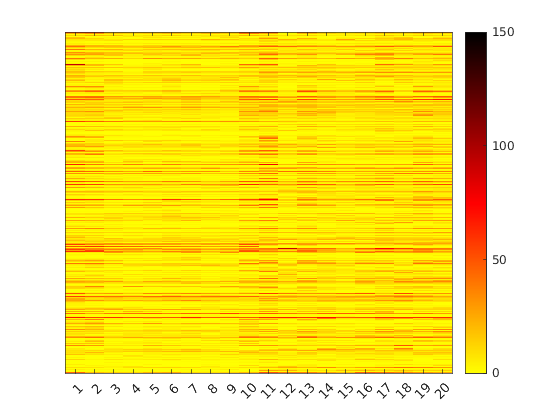

In [11]:
n = 256; % number of color steps

% Red component
R = [ones(1, n/2), linspace(1, 0, n/2)]';

% Green component
G = [linspace(1, 0, n/2), zeros(1, n/2)]';

% Blue component
B = zeros(n, 1);

% Combine into a colormap
my_colormap = [R, G, B];

% Display the colormap
figure;
imagesc(act(:,:,1));
colormap(my_colormap);
colorbar
set(gca, 'YTick', []);
set(gca,'xtick',1:20) 
ax = gca; 
ax.YAxis.TickLength = [0.01 0.035];